# Monty Hall problem

In [98]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import random

In [99]:
N=10000 #N games

#for every game, the disposition of two goats(0) and one car(1) behind doors is changed
doors=np.zeros((N,3))
for i in range (0,N):
    doors[i,0]=1
    random.shuffle(doors[i])

#variables that will simulate door choices or door opening
x=np.zeros(N)
y=np.zeros(N)
z=np.zeros(N)

for i in range (0,N):
    x[i] = random.random() #0 < x < 1: which door is chosen by the first player (conservative)
    y[i] = random.random() #0 < y < 1: which door is opened by the host (only if conservative picked car)
    z[i] = random.random() #0 < z < 1: which door is chosen by the newcomer

#record the results
conservative=np.zeros(N)
switcher=np.zeros(N)
newcomer=np.zeros(N)

In [100]:
for i in range (0,N): 
    if (x[i]<=1/3): #chooses the 1st door
        conservative[i] = doors[i][0] #conservative keeps the door

        if(doors[i][0]==1): #if the car is behind the 1st door, the host opens randomly one of the other two

            if (y[i]<=1/2): #host opens 2nd door
                switcher[i] = doors[i][2] #switcher picks 3rd door

                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2]

            if (1/2<y[i]<=1): #host opens 3rd door
                switcher[i] = doors[i][1] #switcher picks 2nd door
        
                if (z[i]<=1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<=1): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]     

        if(doors[i][0]==0): #the car is not behind the first door, so the host opens the remaining door with the goat

            if(doors[i][1]==0): #the goat is behind the second door, so the host opens the 2nd door
                switcher[i] = doors[i][2] #switcher picks 3rd door

                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2] 

            if(doors[i][1]==1): #the car is behind the second door, so the host opens the 3rd door
                switcher[i] = doors[i][1] #switcher picks 2nd door

                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1] 
    
    if (1/3<x[i]<=2/3): #chooses the 2nd door
        conservative[i] = doors[i][1] #conservative keeps the door

        if(doors[i][1]==1): #if the car is behind the 2nd door, the host opens randomly one of the other two

            if (y[i]<1/2): #host opens 1st door
                switcher[i] = doors[i][2] #switcher picks 3rd door

                if (z[i]<1/2): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2]

            if (1/2<y[i]<1): #host opens 3rd door
                switcher[i] = doors[i][0] #switcher picks 1st door
        
                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]     

        if(doors[i][1]==0): #the car is not behind the 2nd door, so the host opens the remaining door with the goat

            if(doors[i][0]==0): #the goat is behind the 1st door, so the host opens the 1st door
                switcher[i] = doors[i][2] #switcher picks 3rd door

                if (z[i]<1/2): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2] 

            if(doors[i][0]==1): #the car is behind the 1st door, so the host opens the 3rd door
                switcher[i] = doors[i][0] #switcher picks 1st door

                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]

    if (2/3<x[i]<=1): #chooses the 3rd door
        conservative[i] = doors[i][2] #conservative keeps the door

        if(doors[i][2]==1): #if the car is behind the 3rd door, the host opens randomly one of the other two

            if (y[i]<1/2): #host opens 1st door
                switcher[i] = doors[i][1] #switcher picks 2nd door

                if (z[i]<1/2): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2]

            if (1/2<y[i]<1): #host opens 2nd door
                switcher[i] = doors[i][0] #switcher picks 1st door
        
                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2]     

        if(doors[i][2]==0): #if the car is not behind the 3rd door, the host opens the remaining door with the goat

            if(doors[i][0]==0): #the goat is behind the 1st door, so the host opens the 1st door
                switcher[i] = doors[i][1] #switcher picks 2nd door

                if (z[i]<1/2): #newcomer picks 2nd door
                    newcomer[i] = doors[i][1]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2] 

            if(doors[i][0]==1): #the car is behind the 1st door, so the host opens the 2nd door
                switcher[i] = doors[i][0] #switcher picks 1st door

                if (z[i]<1/2): #newcomer picks 1st door
                    newcomer[i] = doors[i][0]
                if (1/2<z[i]<1): #newcomer picks 3rd door
                    newcomer[i] = doors[i][2]

print(conservative)
print(switcher)
print(newcomer)

[0. 0. 1. ... 1. 1. 1.]
[1. 1. 0. ... 0. 0. 0.]
[0. 1. 0. ... 1. 0. 0.]


In [101]:
conservative_win=0
switcher_win=0
newcomer_win=0

for i in range (0,N):
    conservative_win+=conservative[i]
    switcher_win+=switcher[i]
    newcomer_win+=newcomer[i]

conservative_win_freq=conservative_win/N
switcher_win_freq=switcher_win/N
newcomer_win_freq=newcomer_win/N

conservative_loss_freq = (N-conservative_win)/N
switcher_loss_freq = (N-switcher_win)/N
newcomer_loss_freq = (N-newcomer_win)/N

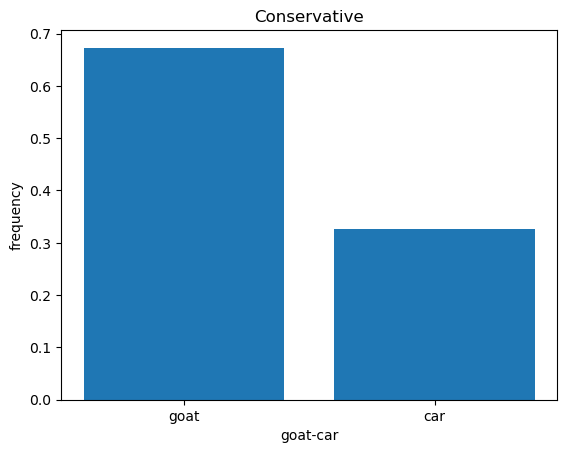

In [102]:
outcome=['goat', 'car']
c_frequency=[conservative_loss_freq, conservative_win_freq]

plt.bar(outcome, c_frequency)
plt.title('Conservative')
plt.xlabel('goat-car')
plt.ylabel('frequency')
plt.show()

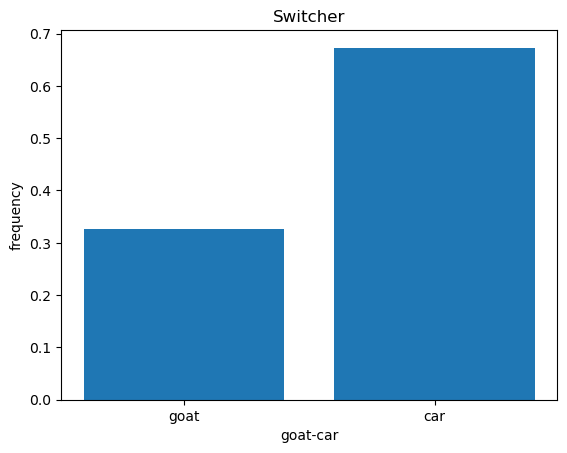

In [103]:
s_frequency=[switcher_loss_freq, switcher_win_freq]

plt.bar(outcome, s_frequency)
plt.title('Switcher')
plt.xlabel('goat-car')
plt.ylabel('frequency')
plt.show()

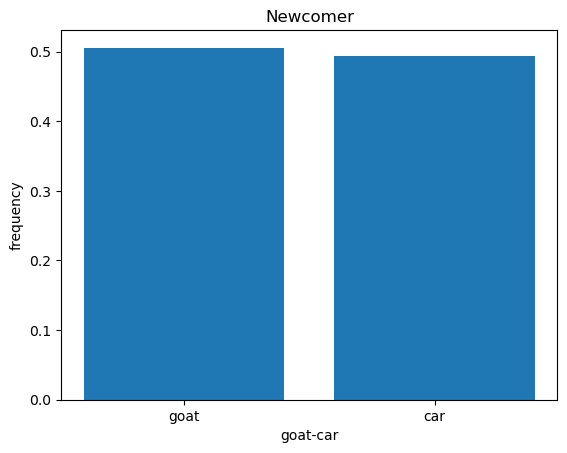

In [104]:
outcome=['goat', 'car']
n_frequency=[newcomer_loss_freq, newcomer_win_freq]

plt.bar(outcome, n_frequency)
plt.title('Newcomer')
plt.xlabel('goat-car')
plt.ylabel('frequency')
plt.show()